In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load your dataset (anime.csv)
df = pd.read_csv('anime.csv')  # Ensure anime.csv is in same folder

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
df.describe(include='all').T



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Missing values per column:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anime_id,12294.0,NaN,NaN,NaN,14058.221653,11455.294701,1.0,3484.25,10260.5,24794.5,34527.0
name,12294,12292,Saru Kani Gassen,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,12232,3264,Hentai,823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,12269,6,TV,3787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,12294,187,1,5677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,12064.0,NaN,NaN,NaN,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,NaN,NaN,NaN,18071.338864,54820.676925,5.0,225.0,1550.0,9437.0,1013917.0


In [ ]:
print("All columns in dataset:")
print(df.columns.tolist())


All columns in dataset:
['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']


In [ ]:
# User-Item matrix: rows = users, columns = anime titles, values = ratings
user_item_matrix = df.pivot_table(index='anime_id', columns='name', values='rating').fillna(0)
print("User-Item Matrix shape:", user_item_matrix.shape)
user_item_matrix.head()


User-Item Matrix shape: (12064, 12062)


name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Cosine similarity between users
cosine_sim = cosine_similarity(user_item_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

print("Cosine similarity matrix shape:", cosine_sim_df.shape)
cosine_sim_df.head()


Cosine similarity matrix shape: (12064, 12064)


anime_id,1,5,6,7,8,15,16,17,18,19,...,34412,34447,34453,34464,34475,34476,34490,34503,34514,34519
anime_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def recommend_anime(user_id, n_recommendations=5):
    if user_id not in cosine_sim_df.index:
        print(f"User {user_id} not found in dataset.")
        return []

    similar_users = cosine_sim_df[user_id].sort_values(ascending=False)[1:11].index  # top-10 similar users

    # Average ratings of similar users
    similar_users_ratings = user_item_matrix.loc[similar_users].mean(axis=0)

    # Remove already rated by target user
    rated_anime = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = similar_users_ratings.drop(rated_anime)

    top_n = recommendations.sort_values(ascending=False).head(n_recommendations)
    return top_n.index.tolist()


In [ ]:
test_user_id = user_item_matrix.index[0]  # pick first user in dataset
recommended_anime = recommend_anime(test_user_id, n_recommendations=5)

print(f"Top 5 anime recommendations for user {test_user_id}:")
for i, anime in enumerate(recommended_anime, start=1):
    print(f"{i}. {anime}")


Top 5 anime recommendations for user 1:
1. Ghost in the Shell: Arise - Border:2 Ghost Whispers
2. Date A Live II
3. Genshiken Nidaime OVA
4. Senbon Matsubara
5. Fate/Zero Cafe


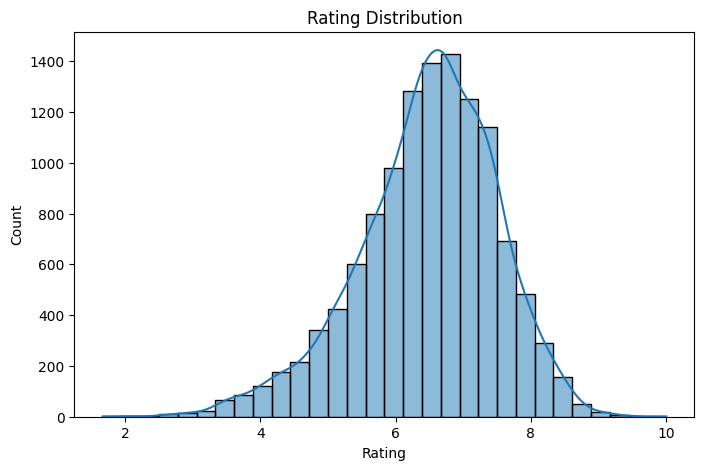

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Interview questions

## 1. What is the difference between user-based and item-based collaborative filtering?

User-based Collaborative Filtering:
Recommends items to a user based on what similar users have liked.
Example:

User A and User B rated many items similarly.

Recommend to User A items that User B liked but A hasn’t seen.

Item-based Collaborative Filtering:
Recommends items similar to the ones the user has already liked.
Example:

If User liked "Anime X", recommend "Anime Y" because many users who liked X also liked Y.

1. User-based is more useful when the user base is small but item base is large.
2. Item-based is more stable because item relationships don’t change as often as user relationships.

## 2. What is collaborative filtering, and how does it work?

Collaborative Filtering (CF) is a recommendation technique that predicts what a user might like based on the past behavior of other users.

It works by:

Collecting user-item interaction data (e.g., ratings).

Calculating similarities between users or items (e.g., using cosine similarity).

Recommending items based on similar users or similar items.

Example Workflow:

Step 1: Build a user-item matrix where rows are users and columns are items with ratings.

Step 2: Calculate similarity (user-user or item-item).

Step 3: For a target user, recommend top N items that similar users liked but the target user hasn’t interacted with.